In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function definitions
def payload_i (x,y,beta_i):
    Hi=np.exp(-beta_i *y/x) -x**2 *(1-np.exp(-y/x))
    return Hi


def payload_mission(x,y,sequence):
    H_list=[]
    for beta_i in sequence:
        H_list.append(payload_i(x,y,beta_i))
    Hm=np.min(H_list)
    return Hm



def time_coeff (x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau


def specific_fuel_cons(x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    Hm=payload_mission(x,y,sequence)
    f=mp_refuel/Hm
    return f

In [3]:
def opt_H(x,y,n):
    return np.exp(-(1/n) *y/x) -x**2 *(1-np.exp(-y/x))

def max_tau(x,y,n):
    return n*(1-np.exp(-(1/n)*y/x))/(1-np.exp(-y/x))

In [4]:
def generate_partitions(n, total, current_partition=None):
    """
    Generates all partitions of 'total' into 'n' integers, where the integer values are between 0 and 'total'.

    Args:
        n (int): Number of integers in the vector.
        total (int): The sum of all integers.
        current_partition (list): The current partition being built.

    Yields:
        list: A list representing one valid partition of 'total' into 'n' parts.
    """
    if current_partition is None:
        current_partition = []

    # Base case: if there's only one element left, it must take the remaining total
    if n == 1:
        if 0 <= total:
            yield current_partition + [total]
        return

    # Recursive case: assign values to the current element and recurse
    for i in range(0, total + 1):
        # Recursively partition the remaining sum into the remaining n-1 elements
        yield from generate_partitions(n - 1, total - i, current_partition + [i])


In [5]:
# Example usage:
n = 5  # Change this to any value of n you want
total_sum = 100

# Generate all possible vectors of size n summing to 100
partitions = list(generate_partitions(n, total_sum))

# Sort each partition and remove duplicates by converting the list to a set of tuples
unique_partitions = set(tuple(sorted(partition)) for partition in partitions)
# Convert the set back to a list and sort it for easier viewing (optional)
unique_partitions = sorted(list(unique_partitions))


unique_partitions=np.array(unique_partitions)/total_sum

#reverse the order of elements along the columns
unique_partitions = unique_partitions[:, ::-1] 
# Sort the partitions lexicographically and then reverse the order of rows
unique_partitions  = unique_partitions [np.lexsort(np.rot90(unique_partitions ))][::-1]



# Print the results
print(f"Number of unique vectors for n={n}: {len(unique_partitions)}")
for partition in unique_partitions:
    print(partition)

Number of unique vectors for n=5: 46262
[1. 0. 0. 0. 0.]
[0.99 0.01 0.   0.   0.  ]
[0.98 0.02 0.   0.   0.  ]
[0.98 0.01 0.01 0.   0.  ]
[0.97 0.03 0.   0.   0.  ]
[0.97 0.02 0.01 0.   0.  ]
[0.97 0.01 0.01 0.01 0.  ]
[0.96 0.04 0.   0.   0.  ]
[0.96 0.03 0.01 0.   0.  ]
[0.96 0.02 0.02 0.   0.  ]
[0.96 0.02 0.01 0.01 0.  ]
[0.96 0.01 0.01 0.01 0.01]
[0.95 0.05 0.   0.   0.  ]
[0.95 0.04 0.01 0.   0.  ]
[0.95 0.03 0.02 0.   0.  ]
[0.95 0.03 0.01 0.01 0.  ]
[0.95 0.02 0.02 0.01 0.  ]
[0.95 0.02 0.01 0.01 0.01]
[0.94 0.06 0.   0.   0.  ]
[0.94 0.05 0.01 0.   0.  ]
[0.94 0.04 0.02 0.   0.  ]
[0.94 0.04 0.01 0.01 0.  ]
[0.94 0.03 0.03 0.   0.  ]
[0.94 0.03 0.02 0.01 0.  ]
[0.94 0.03 0.01 0.01 0.01]
[0.94 0.02 0.02 0.02 0.  ]
[0.94 0.02 0.02 0.01 0.01]
[0.93 0.07 0.   0.   0.  ]
[0.93 0.06 0.01 0.   0.  ]
[0.93 0.05 0.02 0.   0.  ]
[0.93 0.05 0.01 0.01 0.  ]
[0.93 0.04 0.03 0.   0.  ]
[0.93 0.04 0.02 0.01 0.  ]
[0.93 0.04 0.01 0.01 0.01]
[0.93 0.03 0.03 0.01 0.  ]
[0.93 0.03 0.02 0.02 0.  

In [7]:
np.shape(unique_partitions)

(46262, 5)

## Hard consrtraints on the payload mass

In [137]:
y=0.4
x=1.2
H_max=opt_H(x,y,n)
H_min = 0.985*H_max
theoretical_max_tau=max_tau(x,y,n)
tau_max = 1+0.999*(theoretical_max_tau-1)
f_max = 1

In [138]:
print(tau_max)
print(tau_max/theoretical_max_tau)

1.1374310126072165
0.9998790678791034


In [139]:
solutions=[]

for sequence in unique_partitions:
    Hm=payload_mission(x,y,sequence)
    tau=time_coeff (x,y,sequence)
    f=specific_fuel_cons(x,y,sequence)
    
    if (Hm>=H_min) and (tau<=tau_max) and (f<=f_max):
        solutions.append(sequence)
        

np.shape(solutions)

(25, 5)

/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_60150/3312075664.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(solutions[0])).colors


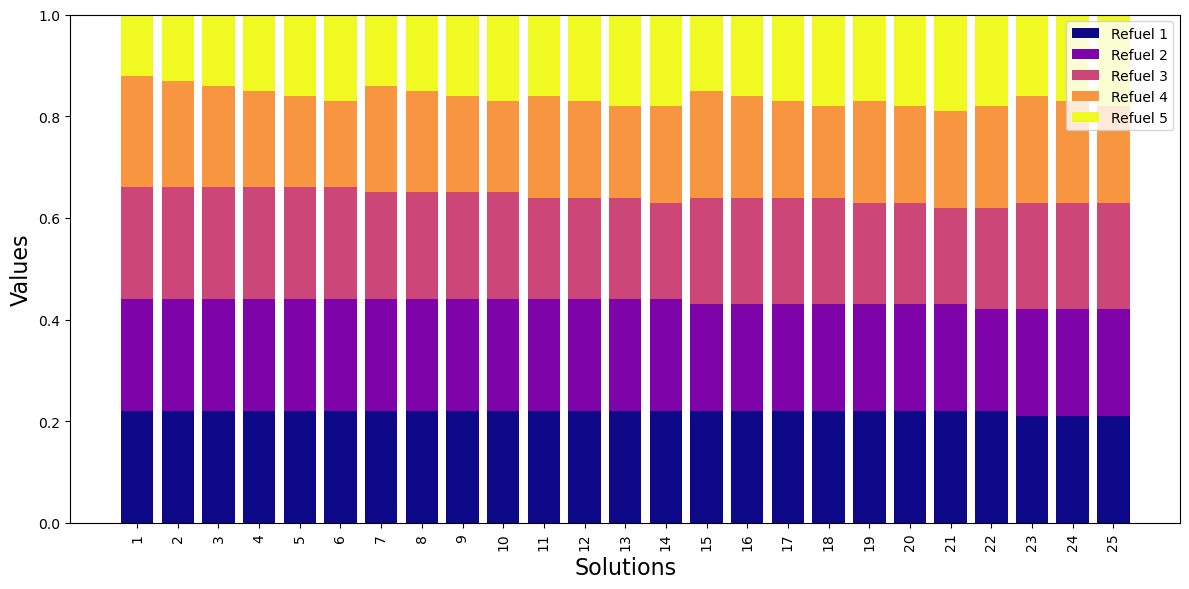

In [140]:
colors = plt.cm.get_cmap('plasma', len(solutions[0])).colors

# Create a stacked bar plot for all rows in a single plot
plt.figure(figsize=(12, 6))

# Iterate through the rows in solutions
for i, row in enumerate(solutions):
    bottom_value = 0
    for j in range(len(row)):
        plt.bar([i+1], row[j], bottom=bottom_value, color=colors[j], label=f'Refuel {j+1}' if i == 0 else "")
        bottom_value += row[j]  # Increment bottom to stack the bars



plt.xlabel('Solutions',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.xticks(range(1, len(solutions) + 1), [f'{i+1}' for i in range(len(solutions))], rotation=90, fontsize=10)
plt.ylim(0, 1)

# Add the legend only once
plt.legend()

plt.tight_layout()
plt.savefig("figures/electric/sat_prob.png",bbox_inches='tight')

plt.show()


## Weak consrtraints on the payload mass

In [141]:
y=0.4
x=1.2
H_max=opt_H(x,y,n)
H_min = 0.6*H_max
theoretical_max_tau=max_tau(x,y,n)
tau_max = 1+0.18*(theoretical_max_tau-1)
f_max = 1

In [142]:
print(tau_max)
print(tau_max/theoretical_max_tau)

1.024762344613913
0.9008356608648205


In [143]:
solutions=[]

for sequence in unique_partitions:
    Hm=payload_mission(x,y,sequence)
    tau=time_coeff (x,y,sequence)
    f=specific_fuel_cons(x,y,sequence)
    
    if (Hm>=H_min) and (tau<=tau_max) and (f<=f_max):
        solutions.append(sequence)
        

np.shape(solutions)

(32, 5)

/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_60150/3385413650.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(solutions[0])).colors


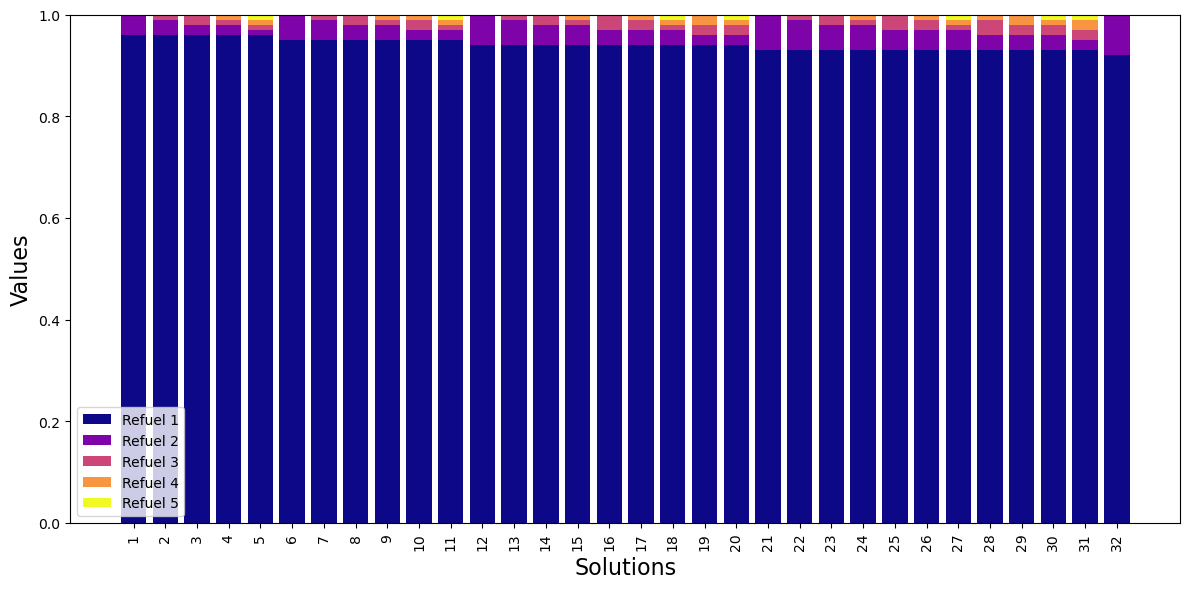

In [144]:
colors = plt.cm.get_cmap('plasma', len(solutions[0])).colors

# Create a stacked bar plot for all rows in a single plot
plt.figure(figsize=(12, 6))

# Iterate through the rows in solutions
for i, row in enumerate(solutions):
    bottom_value = 0
    for j in range(len(row)):
        plt.bar([i+1], row[j], bottom=bottom_value, color=colors[j], label=f'Refuel {j+1}' if i == 0 else "")
        bottom_value += row[j]  # Increment bottom to stack the bars

plt.xlabel('Solutions',fontsize=16)
plt.ylabel('Values',fontsize=16)
plt.xticks(range(1, len(solutions) + 1), [f'{i+1}' for i in range(len(solutions))], rotation=90, fontsize=10)
plt.ylim(0, 1)

# Add the legend only once
plt.legend()

plt.tight_layout()
plt.savefig("figures/electric/sat_prob_2.png",bbox_inches='tight')

plt.show()
